In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import pandas as pd
import random

In [6]:
dataset_path = "../images"

In [7]:
# Lister les dossiers train et test
splits = ["train", "test"]
data_info = []

In [8]:
# Comptage des images par classe
for split in splits:
    split_path = os.path.join(dataset_path, split)
    classes = os.listdir(split_path)
    for cls in classes:
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            count = len(os.listdir(cls_path))
            data_info.append([split, cls, count])

In [9]:
df_info = pd.DataFrame(data_info, columns=["Split", "Classe", "Nb_images"])

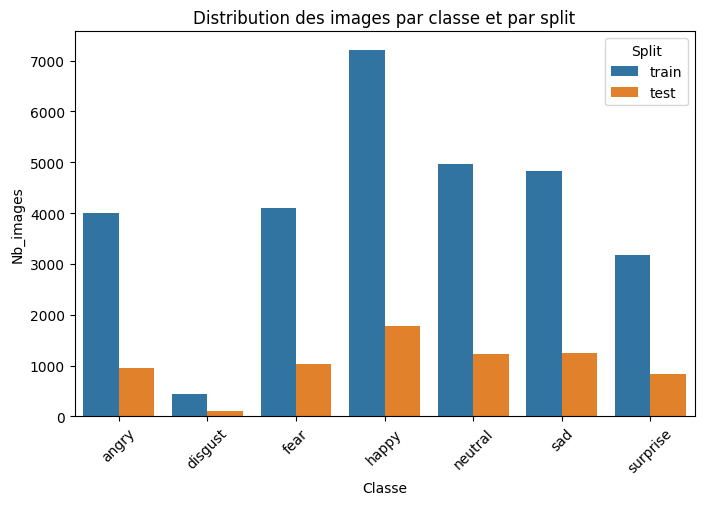

In [10]:
# Afficher distribution
plt.figure(figsize=(8,5))
sns.barplot(x="Classe", y="Nb_images", hue="Split", data=df_info)
plt.title("Distribution des images par classe et par split")
plt.xticks(rotation=45)
plt.show()

In [11]:
# Proportion Train/Test
total_train = df_info[df_info["Split"] == "train"]["Nb_images"].sum()
total_test = df_info[df_info["Split"] == "test"]["Nb_images"].sum()
total_images = total_train + total_test
print(f"Train: {total_train} images ({total_train/total_images:.1%})")
print(f"Test: {total_test} images ({total_test/total_images:.1%})")

Train: 28709 images (80.0%)
Test: 7178 images (20.0%)


In [12]:
#Dimensions
df_info.shape

(14, 3)

In [13]:
df_info

,Split,Classe,Nb_images
0,train,angry,3995
1,train,disgust,436
2,train,fear,4097
3,train,happy,7215
4,train,neutral,4965
5,train,sad,4830
6,train,surprise,3171
7,test,angry,958
8,test,disgust,111
9,test,fear,1024


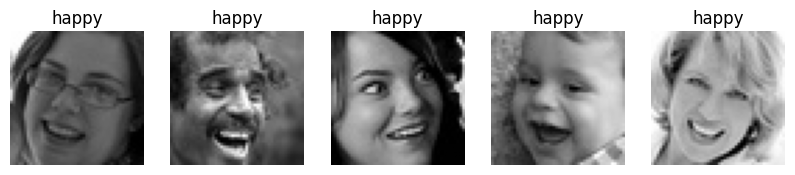

In [14]:
# Fonction pour afficher des exemples d'une classe
def afficher_exemples(split="train", classe="happy", n=5):
    path = os.path.join(dataset_path, split, classe)
    images = os.listdir(path)[:n]
    plt.figure(figsize=(n*2, 2))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis('off')
        plt.title(classe)
    plt.show()

# Exemple : 5 images de la classe "happy" dans le train set
afficher_exemples("train", "happy", n=5)

In [15]:
# Taille moyenne des images
widths, heights = [], []
for split in splits:
    for cls in os.listdir(os.path.join(dataset_path, split)):
        cls_path = os.path.join(dataset_path, split, cls)
        for img_name in os.listdir(cls_path)[:100]:  # on prend un échantillon
            img = Image.open(os.path.join(cls_path, img_name))
            widths.append(img.width)
            heights.append(img.height)

print(f"Taille moyenne des images : {np.mean(widths):.1f} x {np.mean(heights):.1f}")

Taille moyenne des images : 48.0 x 48.0


In [16]:
# Vérifier les images corrompues
# image corrompue = endommagé ou incomplet
corrupted_files = []
for split in splits:
    for cls in os.listdir(os.path.join(dataset_path, split)):
        cls_path = os.path.join(dataset_path, split, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                Image.open(img_path).verify()
            except:
                corrupted_files.append(img_path)

if corrupted_files:
    print(f"⚠️ {len(corrupted_files)} images corrompues trouvées :")
    print(corrupted_files)
else:
    print("✅ Aucune image corrompue trouvée.")

✅ Aucune image corrompue trouvée.


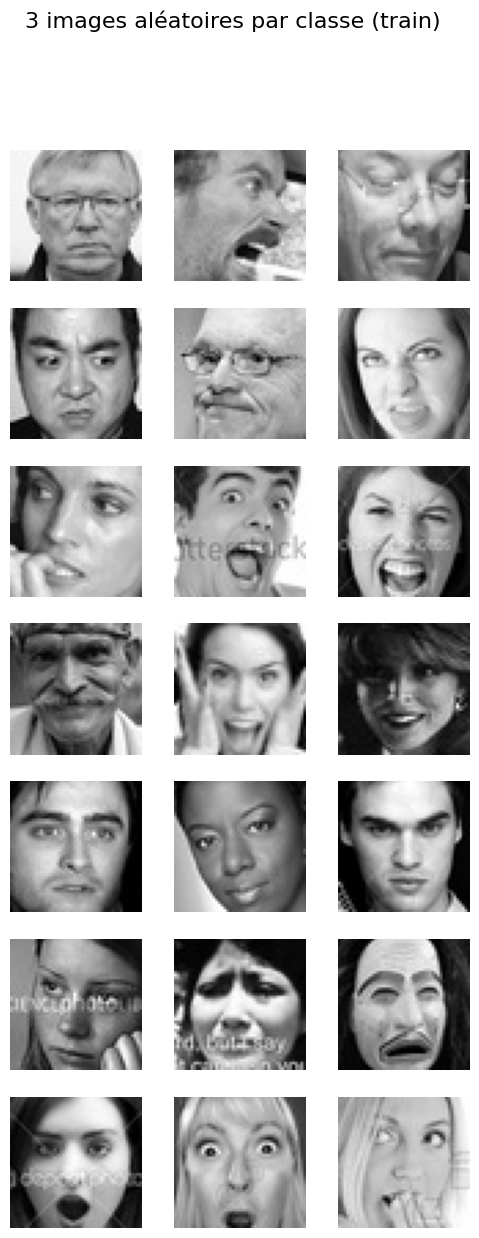

In [17]:
# Fonction pour afficher N images aléatoires par classe
import random
def afficher_images_aleatoires(split="train", n=3):
    split_path = os.path.join(dataset_path, split)
    classes = sorted(os.listdir(split_path))
    plt.figure(figsize=(n*2, len(classes)*2))
    
    for idx, cls in enumerate(classes):
        cls_path = os.path.join(split_path, cls)
        images = os.listdir(cls_path)
        random.shuffle(images)
        for i in range(n):
            img_path = os.path.join(cls_path, images[i])
            img = Image.open(img_path)
            plt.subplot(len(classes), n, idx*n + i + 1)
            plt.imshow(img, cmap="gray")
            plt.axis('off')
            if i == 0:
                plt.ylabel(cls, fontsize=12)
    plt.suptitle(f"{n} images aléatoires par classe ({split})", fontsize=16)
    plt.show()
# Exemple : afficher 3 images aléatoires par classe dans le train
afficher_images_aleatoires("train", n=3)